In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as scs

In [65]:
df = pd.read_csv("../ml_datasets/loan_data.csv")

In [66]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [67]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [68]:
df.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [69]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,1428.0,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,1.0,0.108147,276.029727,10.901808,11.581947,712.042017,4505.133637,13555.452381,43.569748,1.018207,0.193978,0.075630,0.163866
std,0.0,0.020213,187.915367,0.585102,6.716894,37.255134,2380.179718,17150.838011,28.579624,1.198436,0.557341,0.267135,0.370283
min,1.0,0.060000,15.690000,8.517193,0.000000,627.000000,1110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.094500,154.282500,10.524064,6.015000,682.000000,2729.729167,3112.750000,18.675000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.107100,228.220000,10.878047,11.370000,707.000000,4169.979166,8290.500000,42.550000,1.000000,0.000000,0.000000,0.000000
75%,1.0,0.121700,338.100000,11.272042,17.002500,737.000000,5639.968750,17221.250000,66.225000,2.000000,0.000000,0.000000,0.000000
max,1.0,0.183600,895.560000,14.528354,29.420000,822.000000,16259.041670,148829.000000,99.400000,8.000000,5.000000,2.000000,1.000000


In [70]:
df.purpose.value_counts()

purpose
debt_consolidation    559
all_other             359
credit_card           251
home_improvement       94
small_business         65
major_purchase         55
educational            45
Name: count, dtype: int64

### Label encoding purpose

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])

In [72]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [73]:
df['purpose'] = df['purpose'].astype(float)

### Scale down large values

In [74]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
columns = df.iloc[:,4:10]
for col in columns:
    df[col] = mm.fit_transform(df[[col]])
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2.0,0.1189,829.10,0.471325,0.662135,0.564103,0.299026,0.193874,0.524145,0,0,0,0
1,1,1.0,0.1071,228.22,0.426698,0.485724,0.410256,0.108918,0.225917,0.771630,0,0,0,0
2,1,2.0,0.1357,366.86,0.308809,0.395309,0.282051,0.237639,0.023591,0.257545,1,0,0,0
3,1,2.0,0.1008,162.34,0.471325,0.275323,0.435897,0.104954,0.226213,0.736419,1,0,0,0
4,1,1.0,0.1426,102.92,0.462895,0.508838,0.205128,0.195128,0.031849,0.397384,0,1,0,0


## Split data into train and test

In [75]:
x = df.iloc[:, :13]
y = df['not.fully.paid']

In [76]:
x.shape, y.shape

((1428, 13), (1428,))

In [77]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1, shuffle=True)

In [78]:
xtrain.shape

(1071, 13)

## Training of data

In [79]:
from sklearn.metrics import accuracy_score, r2_score, classification_report

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
ypred = lr.predict(xtest)

In [82]:
accuracy_score(ytest, ypred)

0.8375350140056023

<Axes: >

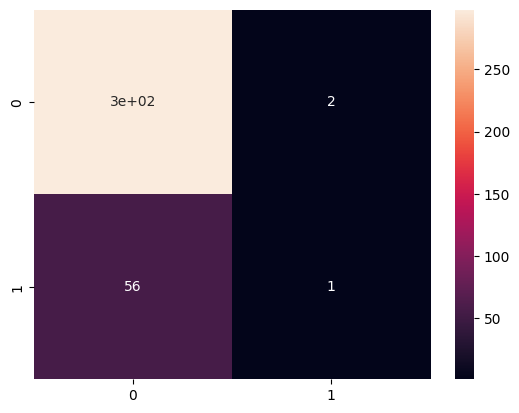

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
scs.heatmap(data=cm, annot=True)

In [85]:
from sklearn.metrics import r2_score
rscore = r2_score(ytest, ypred)
print("Accuracy: ", rscore*100, "%")

Accuracy:  -21.087719298245624 %


## KNN Classification

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(p=1)

In [94]:
ypred = knn.predict(xtest)
accuracy_score(ytest, ypred)

0.8375350140056023

## Naive Bayes Gausiann 

In [86]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [87]:
ypred = nb.predict(xtest)

In [88]:
print("Accuracy: ",accuracy_score(ytest, ypred))

Accuracy:  0.7647058823529411
